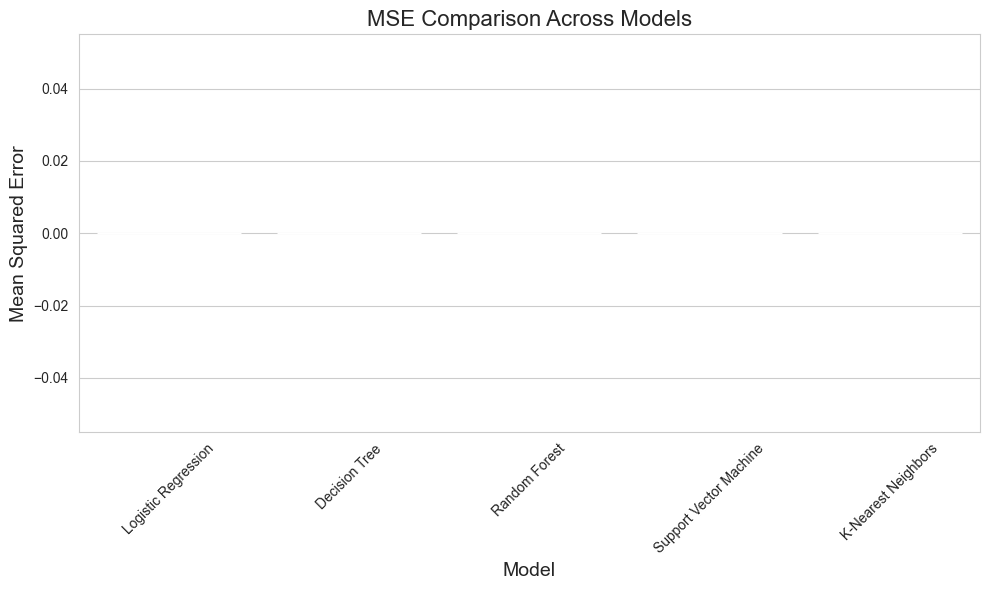

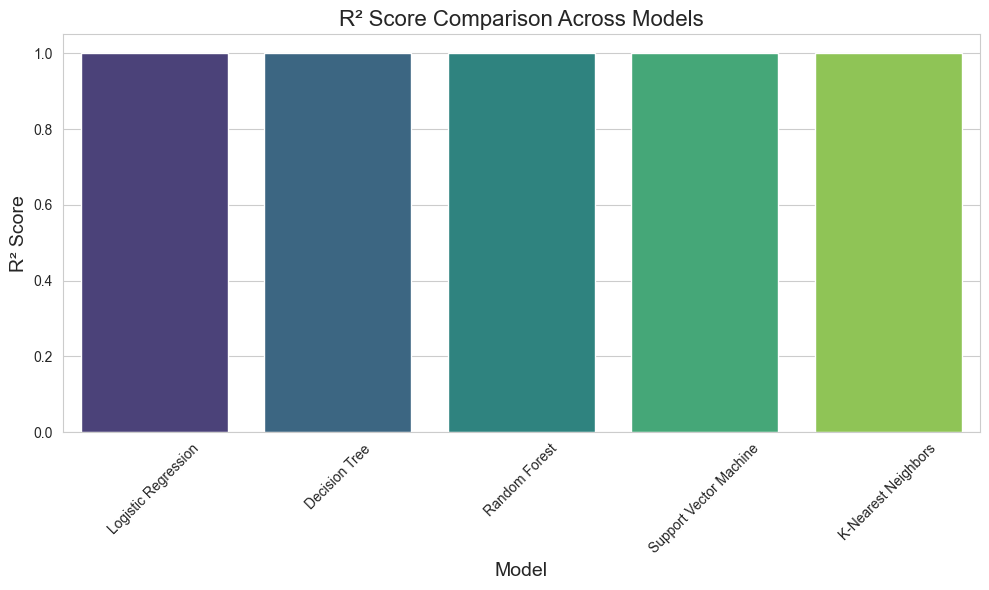

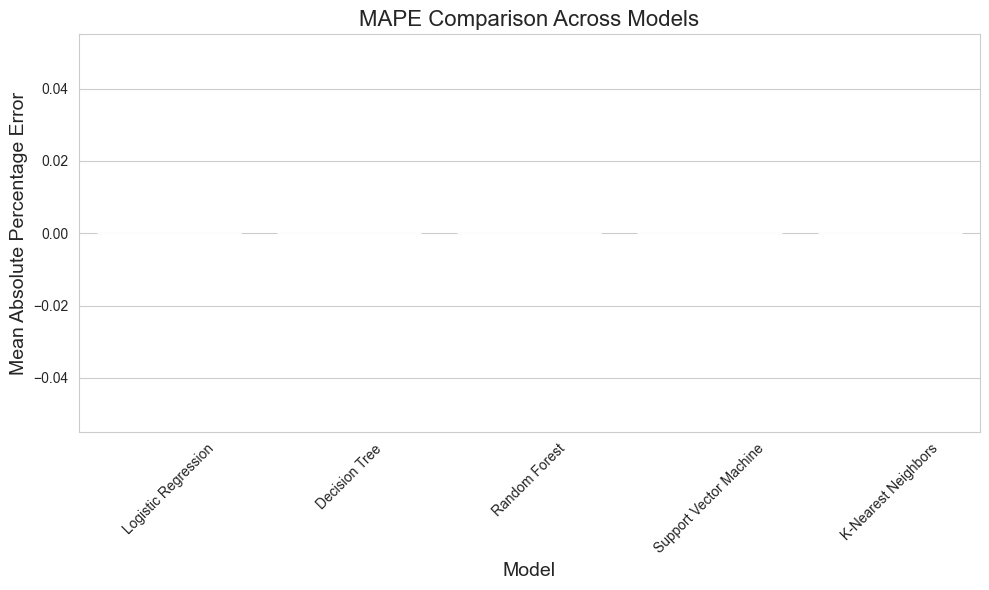

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv('../data/dataset.csv')

# Create avg_attendance and debarred columns
attendance_cols = ['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24',
                   'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24', 'Dec-24']
df['avg_attendance'] = df[attendance_cols].mean(axis=1)
df['debarred'] = (df['avg_attendance'] < 75).astype(int)

# Features and labels
X = df[['avg_attendance']]
y = df['debarred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'R²': [], 'MAPE': []}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R²'].append(r2)
    results['MAPE'].append(mape)

# Create DataFrame
results_df = pd.DataFrame(results)

# Set seaborn style
sns.set_style("whitegrid")

# Pick 5 colors from viridis palette manually
colors = sns.color_palette('viridis', n_colors=5)

# Plot MSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', hue='Model', data=results_df, palette=colors, legend=False)
plt.title('MSE Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R² Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', hue='Model', data=results_df, palette=colors, legend=False)
plt.title('R² Score Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAPE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAPE', hue='Model', data=results_df, palette=colors, legend=False)
plt.title('MAPE Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Percentage Error', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
